In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

In [3]:
comp_leader_df = df[df['compensation_leader_compensation'].isnull() == False]

In [4]:
comp_leader_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290 entries, 0 to 8189
Data columns (total 21 columns):
accountability_score                   7290 non-null float64
administrative_expenses                7290 non-null float64
charity_name                           7288 non-null object
charity_url                            7290 non-null object
city                                   7289 non-null object
cn_advisory                            4 non-null object
compensation_leader_compensation       7290 non-null float64
compensation_leader_expense_percent    7290 non-null float64
compensation_leader_title              7290 non-null object
excess_or_deficit_for_year             7290 non-null float64
financial_score                        7290 non-null float64
fundraising_expenses                   7290 non-null int64
net_assets                             7290 non-null int64
other_revenue                          7290 non-null float64
overall_score                          7290 non-nul

In [5]:
comp_leader_df.columns

Index(['accountability_score', 'administrative_expenses', 'charity_name',
       'charity_url', 'city', 'cn_advisory',
       'compensation_leader_compensation',
       'compensation_leader_expense_percent', 'compensation_leader_title',
       'excess_or_deficit_for_year', 'financial_score', 'fundraising_expenses',
       'net_assets', 'other_revenue', 'overall_score',
       'payments_to_affiliates', 'program_expenses', 'state',
       'total_contributions', 'org_type', 'org_category'],
      dtype='object')

In [6]:
comp_leader_df.drop(['charity_name', 'charity_url', 
                     'city', 'cn_advisory', 
                     'state', 'org_type',
                     'org_category', 'compensation_leader_title'], 
                    axis = 1, inplace = True)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(comp_leader_df)
scaled_features = scaler.transform(comp_leader_df)

In [12]:
comp_leader_feat = pd.DataFrame(scaled_features, columns = comp_leader_df.columns)
comp_leader_feat.head()

,accountability_score,administrative_expenses,compensation_leader_compensation,compensation_leader_expense_percent,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,payments_to_affiliates,program_expenses,total_contributions
0,-0.263579,-0.186773,-0.866057,-0.181814,-0.047114,0.462148,-0.156168,-0.176026,-0.146236,0.330661,-0.075369,-0.186006,-0.180195
1,-0.601692,-0.048412,-0.711788,-0.869707,0.022858,-0.004671,-0.165434,-0.099415,-0.103574,-0.157966,-0.075369,-0.147726,-0.157962
2,-0.714396,-0.198450,-0.623248,-1.071041,-0.115813,-0.836696,-0.133811,-0.188129,-0.152597,-0.799611,-0.075369,-0.081977,-0.080003
3,-0.601692,-0.156641,-0.806334,-1.159125,0.081865,1.160365,-0.111714,-0.118328,-0.163070,0.355093,-0.075369,-0.099625,-0.052384
4,0.638054,-0.191633,-0.706060,0.782913,-0.085533,0.112034,-0.160089,-0.179602,-0.148440,0.442531,-0.075369,-0.190529,-0.192874


In [13]:
X = comp_leader_feat[['administrative_expenses', 'excess_or_deficit_for_year',
                      'fundraising_expenses', 'net_assets',
                      'other_revenue', 'payments_to_affiliates',
                      'compensation_leader_compensation', 'compensation_leader_expense_percent']]
y = comp_leader_df['financial_score']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeficient'])

In [17]:
print('Intercept: \n', lm.intercept_)
print(cdf)

Intercept: 
 85.9129446264801
                                     Coeficient
administrative_expenses               -0.892748
excess_or_deficit_for_year             0.363599
fundraising_expenses                  -0.887173
net_assets                             0.980748
other_revenue                          0.193472
payments_to_affiliates                -0.054555
compensation_leader_compensation       0.423020
compensation_leader_expense_percent   -1.400087


In [18]:
predictions = lm.predict(X_test)

In [19]:
error = pd.DataFrame((y_test - predictions))

In [20]:
error.abs().mean()

financial_score    6.832091
dtype: float64

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


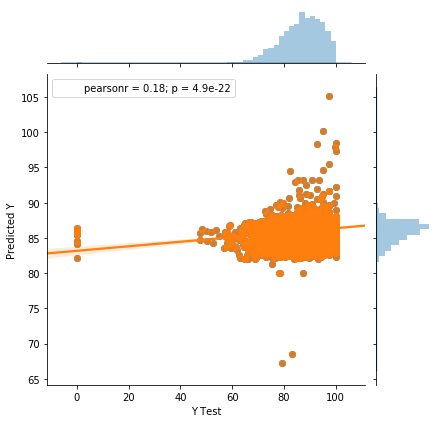

In [21]:
ax = sns.jointplot(x = y_test, y = predictions, 
                   kind = 'scatter');
ax.set_axis_labels('Y Test', 'Predicted Y')
ax.plot(sns.regplot, sns.distplot);

In [22]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2: ', lm.score(X_train, y_train))

MAE:  6.832090824611066
MSE:  90.68591457998905
RMSE: 9.522915235367217
R^2:  0.03621171211997143


/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


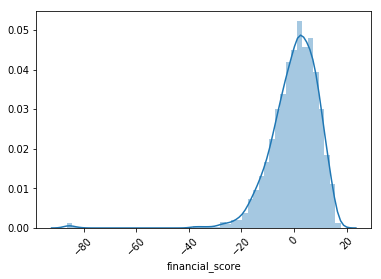

In [23]:
ax = sns.distplot((y_test - predictions), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)